# Loan Status Prediction Project
1. Author: Muhammad Uzair
2. Dataset:
       https://www.kaggle.com/datasets/ninzaami/loan-predication?select=train_u6lujuX_CVtuZ9i+%281%29.csv

# Imoorting Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [71]:
df = pd.read_csv('./dataset.csv')

In [72]:
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [73]:
df.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

# Data Visualization 

# Loan Amount Graph

C:\Users\muxair\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


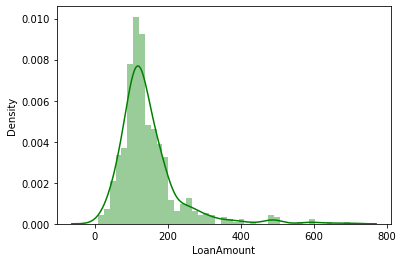

In [74]:
sns.distplot(df['LoanAmount'], color='green');
plt.show();

# CoapplicantIncome

C:\Users\muxair\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


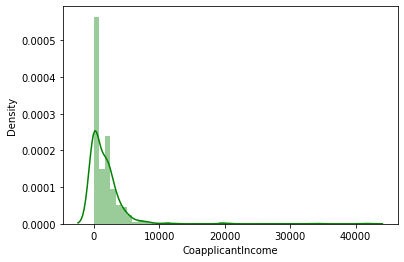

In [9]:
sns.distplot(df['CoapplicantIncome'], color='green');
plt.show();

# Educatino and Loan
1. In bellow graph you can see how many graduated and non graduated people are eligible for the loan

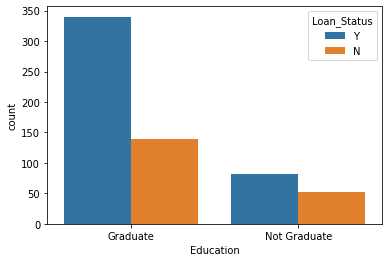

In [76]:
sns.countplot(x='Education', hue='Loan_Status', data=df);
plt.show();

# Material Status & Loan

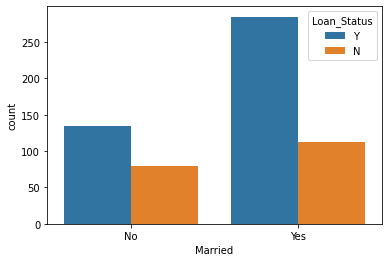

In [77]:
sns.countplot(x = 'Married', hue='Loan_Status', data=df)
plt.show()

# Dependents and Loan

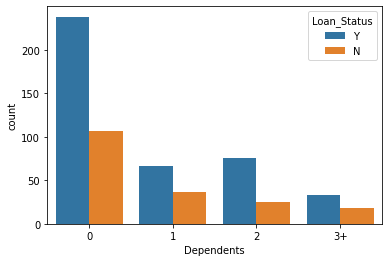

In [78]:
sns.countplot(x = 'Dependents', hue='Loan_Status', data=df)
plt.show()

# Find Null Values

In [10]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [19]:
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [83]:
print(df['Gender'].value_counts())
print(df['Married'].value_counts())
print(df['Education'].value_counts())
print(df['Self_Employed'].value_counts())
print(df['Property_Area'].value_counts())
print(df['Loan_Status'].value_counts())
print(df['Dependents'].value_counts())

Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
Y    422
N    192
Name: Loan_Status, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


In [84]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [85]:
# 0-> Female & 1-> Male
df['Gender'] = le.fit_transform(df['Gender'])
# 0-> No & 1-> yes
df['Married'] = le.fit_transform(df['Married'])
# 0 -> Graduate & 1-> Non Graduate
df['Education'] = le.fit_transform(df['Education']) 
# 0-> No & 1-> yes
df['Self_Employed'] = le.fit_transform(df['Self_Employed']) 
# 0-> urban, 1-> Rular & 3->Semiurban    
df['Property_Area'] = le.fit_transform(df['Property_Area']) 
# 1-> Yes & 0->No
df['Loan_Status'] = le.fit_transform(df['Loan_Status']) 



In [86]:
df.head()

Loan_ID  Gender  Married Dependents  Education  Self_Employed  \
0  LP001002       1        0          0          0              0   
1  LP001003       1        1          1          0              0   
2  LP001005       1        1          0          0              1   
3  LP001006       1        1          0          1              0   
4  LP001008       1        0          0          0              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  Property_Area  Loan_Status  
0             1.0              2            1  
1             1.0              0            0  
2             1.0              2            1  
3             1.0              2            1  
4             1.0              2            1

In [87]:
print(df['Gender'].value_counts())
print(df['Married'].value_counts())
print(df['Education'].value_counts())
print(df['Self_Employed'].value_counts())
print(df['Property_Area'].value_counts())
print(df['Loan_Status'].value_counts())
print(df['Dependents'].value_counts())

1    489
0    112
2     13
Name: Gender, dtype: int64
1    398
0    213
2      3
Name: Married, dtype: int64
0    480
1    134
Name: Education, dtype: int64
0    500
1     82
2     32
Name: Self_Employed, dtype: int64
1    233
2    202
0    179
Name: Property_Area, dtype: int64
1    422
0    192
Name: Loan_Status, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


In [88]:
df.replace({'Gender' : {2 : df['Married'].median()}}, inplace=True)
df.replace({'Married' : {2 : df['Married'].median()}}, inplace=True)
df.replace({'Self_Employed' : {2 : df['Self_Employed'].median()}}, inplace=True)

In [93]:
df.replace({'Dependents' : {'3+' : 4}}, inplace=True)
df['Dependents'].fillna(df['Dependents'].median(), inplace=True)

In [94]:
print(df['Gender'].value_counts())
print(df['Married'].value_counts())
print(df['Education'].value_counts())
print(df['Self_Employed'].value_counts())
print(df['Property_Area'].value_counts())
print(df['Loan_Status'].value_counts())

1    502
0    112
Name: Gender, dtype: int64
1    401
0    213
Name: Married, dtype: int64
0    480
1    134
Name: Education, dtype: int64
0    532
1     82
Name: Self_Employed, dtype: int64
1    233
2    202
0    179
Name: Property_Area, dtype: int64
1    422
0    192
Name: Loan_Status, dtype: int64


In [95]:
df.head()

Loan_ID  Gender  Married Dependents  Education  Self_Employed  \
0  LP001002       1        0          0          0              0   
1  LP001003       1        1          1          0              0   
2  LP001005       1        1          0          0              1   
3  LP001006       1        1          0          1              0   
4  LP001008       1        0          0          0              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0       128.0             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History  Property_Area  Loan_Status  
0             1.0              2            1  
1             1.0              0            0  
2             1.0              2            1  
3             1.0              2            1  
4             1.0              2            1

# Check Null Values in df

In [96]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Seperate Dependent and Independent Features

In [98]:
X = df.drop(columns=['Loan_ID','Loan_Status'], axis=1)
Y = df['Loan_Status']

In [100]:
# print(X)
# print(Y)

# Split df to Training & Testing Data

In [101]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [103]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.2, stratify=Y, random_state=42)

In [104]:
print(X_train.shape, X_test.shape)

(491, 11) (123, 11)


# Train Different Models

# Logistic Regression

In [108]:
from sklearn.linear_model import LogisticRegression

In [114]:
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train,Y_train)

LogisticRegression(max_iter=200)

In [111]:
lr_train_pred = lr_model.predict(X_train)
lr_train_acc = accuracy_score(Y_train, lr_train_pred)
print("Training accuracy of linear model : ", lr_train_acc)

Training accuracy of linear model :  0.7963340122199593


In [115]:
lr_test_pred = lr_model.predict(X_test)
lr_test_acc = accuracy_score(Y_test, lr_test_pred)
print("Training accuracy of linear model : ", lr_test_acc)

Training accuracy of linear model :  0.8617886178861789


In [117]:
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

# SVM Model

In [148]:
svm_model = svm.SVC(kernel='linear')


In [149]:
svm_model.fit(X_train, Y_train)

SVC(kernel='linear')

In [150]:
svm_train_pred = svm_model.predict(X_train)
svm_train_acc = accuracy_score(Y_train, svm_train_pred)
print("Training accuracy of linear model : ", svm_train_acc)

Training accuracy of linear model :  0.7355516637478109


In [151]:
svm_test_pred = lr_model.predict(X_test)
svm_test_acc = accuracy_score(Y_test, svm_test_pred)
print("Training accuracy of linear model : ", svm_test_acc)

Training accuracy of linear model :  0.6783216783216783


# Decission Tree

In [233]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(max_depth=2)


In [234]:
DT.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=2)

In [235]:
DT_train_pred = DT.predict(X_train)
DT_train_acc = accuracy_score(Y_train, DT_train_pred)
print("Training accuracy of linear model : ", DT_train_acc)

Training accuracy of linear model :  0.7740805604203153


In [236]:
DT_test_pred = DT.predict(X_test)
DT_test_acc = accuracy_score(Y_test, DT_test_pred)
print("Training accuracy of linear model : ", DT_test_acc)

Training accuracy of linear model :  0.7762237762237763


# Random Forest

In [155]:
from sklearn.ensemble import RandomForestClassifier

In [319]:
rf = RandomForestClassifier(max_depth=7, ccp_alpha=0.0)

In [321]:
rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=7)

In [322]:
rf_train_pred = rf.predict(X_train)
rf_train_acc = accuracy_score(Y_train, rf_train_pred)
print("Training accuracy of linear model : ", rf_train_acc)

Training accuracy of linear model :  0.9141856392294221


In [323]:
rf_test_pred = rf.predict(X_test)
rf_test_acc = accuracy_score(Y_test, rf_test_pred)
print("Training accuracy of linear model : ", rf_test_acc)

Training accuracy of linear model :  0.8461538461538461


# Ada Boosting Algo

In [324]:
from sklearn.ensemble import AdaBoostClassifier

In [350]:
ada = AdaBoostClassifier(learning_rate=1, n_estimators=100)

In [351]:
ada.fit(X_train, Y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=100)

In [352]:
ada_train_pred = ada.predict(X_train)
ada_train_acc = accuracy_score(Y_train, ada_train_pred)
print("Training accuracy of linear model : ", ada_train_acc)

Training accuracy of linear model :  0.8984238178633975


In [353]:
ada_test_pred = ada.predict(X_test)
ada_test_acc = accuracy_score(Y_test, ada_test_pred)
print("Training accuracy of linear model : ", ada_test_acc)

Training accuracy of linear model :  0.7972027972027972
